In [1]:
import os
from utils import read_accs_from_folder
from utils import plot_acc_merged

ROOT = "./results"
model_name = "llm-jp-3-13b-exp1-multi-ja"
model_name = "llm-jp-3-13b-exp1-multi-en"
model_name = "llm-jp-3-13b-exp4-medical-ja"
model_name = "llm-jp-3-13b-exp1-en_jstage"

template = "minimal"
num_shot = 0

result_dir = os.path.join(ROOT, f"{model_name}_{template}_{str(num_shot)}-shot")

/home/xzhao/workspace/med-eval/dataset/utils.py:90: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if train_domain is not "mixed":


/home/xzhao/workspace/med-eval/dataset/utils.py:175: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


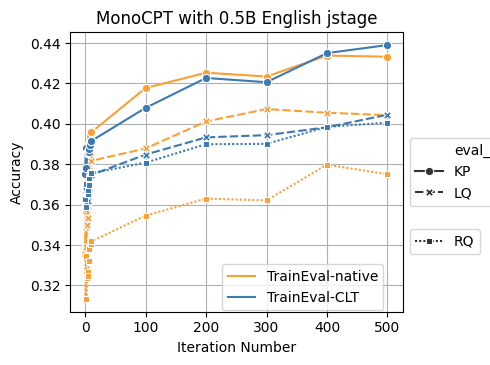

In [2]:

is_ood = False
delta_acc = False
df = read_accs_from_folder(result_dir, model_name, is_ood=is_ood, delta_acc=delta_acc)
df = df[df["iter_num"] <= 500]
train_lang = 'English' if df['train_lang'].values[0] == 'en' else 'Japanese'
train_domain = 'PubMed' if df['train_domain'].values[0] == 'pubmed' else 'jstage'
plot_acc_merged(df, is_ood=is_ood, delta_acc=delta_acc, title=f"MonoCPT with 0.5B {train_lang} {train_domain}")


/home/xzhao/workspace/med-eval/dataset/utils.py:175: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


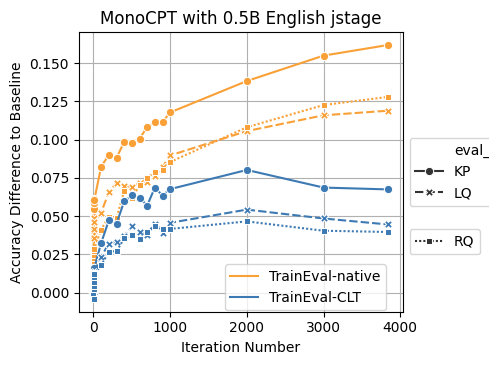

In [3]:

is_ood = False
delta_acc = True
df = read_accs_from_folder(result_dir, model_name, is_ood=is_ood, delta_acc=delta_acc)
train_lang = 'English' if df['train_lang'].values[0] == 'en' else 'Japanese'
train_domain = 'PubMed' if df['train_domain'].values[0] == 'pubmed' else 'jstage'
plot_acc_merged(df, is_ood=is_ood, delta_acc=delta_acc, title=f"MonoCPT with 0.5B {train_lang} {train_domain}")


/home/xzhao/workspace/med-eval/dataset/utils.py:175: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


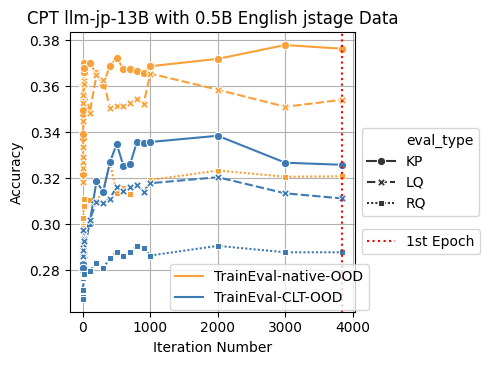

In [15]:

is_ood = True
delta_acc = False
df = read_accs_from_folder(result_dir, model_name, is_ood=is_ood, delta_acc=delta_acc)
train_lang = 'English' if df['train_lang'].values[0] == 'en' else 'Japanese'
train_domain = 'PubMed' if df['train_domain'].values[0] == 'pubmed' else 'jstage'
plot_acc_merged(df, is_ood=is_ood, delta_acc=delta_acc, title=f"CPT llm-jp-13B with 0.5B {train_lang} {train_domain} Data")


/home/xzhao/workspace/med-eval/dataset/utils.py:175: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


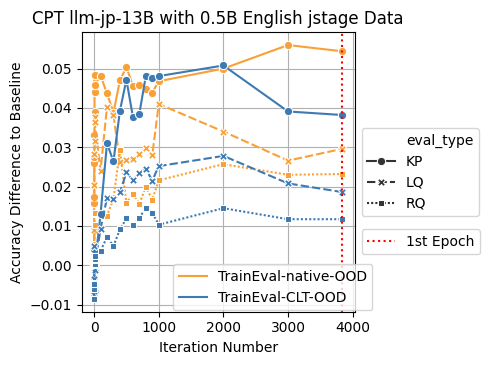

In [16]:

is_ood = True
delta_acc = True
df = read_accs_from_folder(result_dir, model_name, is_ood=is_ood, delta_acc=delta_acc)
train_lang = 'English' if df['train_lang'].values[0] == 'en' else 'Japanese'
train_domain = 'PubMed' if df['train_domain'].values[0] == 'pubmed' else 'jstage'
plot_acc_merged(df, is_ood=is_ood, delta_acc=delta_acc, title=f"CPT llm-jp-13B with 0.5B {train_lang} {train_domain} Data")


In [ ]:
from turtle import title
import seaborn as sns
import matplotlib.pyplot as plt

def plot_acc(_df, title):

    # Create the line plot
    plt.figure(figsize=(7, 3.75))
    sns.lineplot(data=_df, x='iter_num', y='delta_acc', hue='identifier', marker='o')

    # Add a vertical dotted line at iter_num=3841
    plt.axvline(x=3841, color='red', linestyle='dotted', label='1st Epoch (3841)')
    plt.axvline(x=15327, color='red', linestyle='dotted', label='4th Epoch (15327)')

    plt.title(title)
    plt.xlabel("Iteration Number")
    plt.ylabel("Accuracy")
    # plt.ylabel("Accuracy Difference to Baseline")
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.tight_layout()
    plt.show()


# _df = df[df["task-prefix"].str.contains("mono")]
_df = df[df["task-prefix"].str.contains("KP")]
plot_acc(_df, "CPT llm-jp-13B with 0.5B Japanese Data\n(KP Evaluation)")

# _df = df[df["task-prefix"].str.contains("bi")]
_df = df[df["task-prefix"].str.contains("LQ")]
plot_acc(_df, "CPT llm-jp-13B with 0.5B Japanese Data\n(LQ Evaluation)")

# _df = df[df["task-prefix"].str.contains("tri")]
_df = df[df["task-prefix"].str.contains("RQ")]
plot_acc(_df, "CPT llm-jp-13B with 0.5B Japanese Data\n(RQ Evaluation)")